In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the paths to the subdirectories
animal_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/animal/'
vehicles_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/vehicle/'
flower_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/flower/'
land_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/landscape/'
human_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/human/'
fruit_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/fruit/'
bird_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/birds/'
# Function to count images in a directory
def count_images(directory):
    return len([file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.bmp'))])

# Get the counts for each directory
animal_count = count_images(animal_dir)
vehicles_count = count_images(vehicles_dir)
flower_count = count_images(flower_dir)
land_count = count_images(land_dir)
human_count = count_images(human_dir)
fruit_count = count_images(fruit_dir)
bird_count = count_images(bird_dir)
# Print the results
print(f"Number of images in 'animal' folder: {animal_count}")
print(f"Number of images in 'vehicles' folder: {vehicles_count}")
print(f"Number of images in 'flower' folder: {flower_count}")
print(f"Number of images in 'landscape' folder: {land_count}")
print(f"Number of images in 'human' folder: {human_count}")
print(f"Number of images in 'fruit' folder: {fruit_count}")
print(f"Number of images in 'bird' folder: {bird_count}")

Number of images in 'animal' folder: 570
Number of images in 'vehicles' folder: 384
Number of images in 'flower' folder: 165
Number of images in 'landscape' folder: 150
Number of images in 'human' folder: 431
Number of images in 'fruit' folder: 143
Number of images in 'bird' folder: 2625


In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/'
image_size = (224, 224)
batch_size = 32
epochs = 30


In [ ]:
# prompt: next step

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

# Load and preprocess the data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3576 images belonging to 7 classes.
Found 892 images belonging to 7 classes.


In [ ]:
# prompt: take the next step
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load the VGG16 model with pre-trained weights (excluding the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # Change to 7 classes to match the data

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=validation_data
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 3297s 28s/step - accuracy: 0.6873 - loss: 0.9868 - val_accuracy: 0.9002 - val_loss: 0.2974
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 105s 673ms/step - accuracy: 0.9119 - loss: 0.2749 - val_accuracy: 0.9081 - val_loss: 0.2330
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 78s 659ms/step - accuracy: 0.9386 - loss: 0.1885 - val_accuracy: 0.9283 - val_loss: 0.1981
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 82s 657ms/step - accuracy: 0.9440 - loss: 0.1568 - val_accuracy: 0.9372 - val_loss: 0.1830
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 78s 667ms/step - accuracy: 0.9571 - loss: 0.1329 - val_accuracy: 0.9013 - val_loss: 0.2521
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 83s 660ms/step - accuracy: 0.9558 - loss: 0.1233 - val_accuracy: 0.9350 - val_loss: 0.1697
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 86s 712ms/step - accuracy: 0.9705 - loss: 0.0903 - val_accuracy: 0.9372 - val_loss: 0.1742
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 665ms/step - accuracy: 0.9672 - loss: 0.1002 - va

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fine_tuned_vgg16.h5')


In [ ]:
# Unfreeze the top few layers of the base model
for layer in base_model.layers[-4:]:  # Use 'base_model' instead of 'vgg16_base'
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine_tune = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batch_size,
    epochs=5
)


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 912ms/step - accuracy: 0.9969 - loss: 0.0161 - val_accuracy: 0.9403 - val_loss: 0.1875
Epoch 2/5
 1/46 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 1.0000 - loss: 0.0013

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9333 - val_loss: 0.1182
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 759ms/step - accuracy: 0.9993 - loss: 0.0059 - val_accuracy: 0.9460 - val_loss: 0.1864
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9333 - val_loss: 0.5942
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 759ms/step - accuracy: 0.9956 - loss: 0.0091 - val_accuracy: 0.9602 - val_loss: 0.1738


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fine_tuned_vgg16.h5')

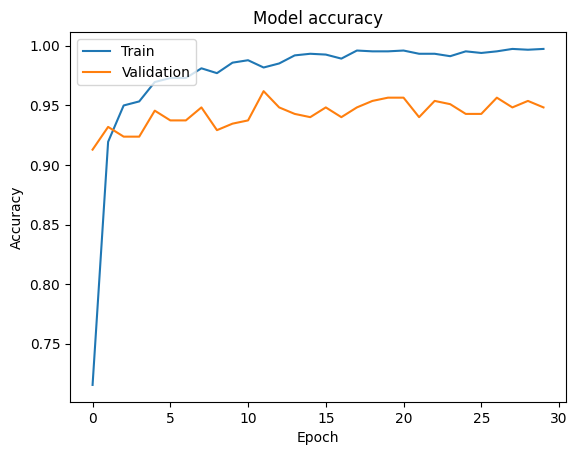

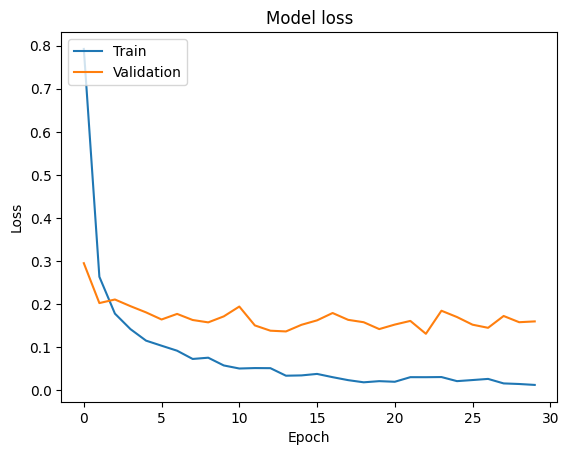

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Untitled.jpeg to Untitled (1).jpeg
Saving Untitlederger.jpeg to Untitlederger.jpeg
Saving Untigregregtled.jpeg to Untigregregtled.jpeg


In [ ]:

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/fine_tuned_vgg16.h5')


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Untitled (1).jpeg
[[0. 1. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Untitlederger.jpeg
[[0. 1. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Untigregregtled.jpeg
[[0. 1. 0. 0. 0. 0.]]


In [ ]:
import numpy as np
class_names = ['animal', 'flower','landscape','human', 'fruit', 'vehicles']  # Replace with your actual class names

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  predicted_class_index = np.argmax(classes[0])
  predicted_class_name = class_names[predicted_class_index]
  print(predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Untitled (1).jpeg
flower
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Untitlederger.jpeg
flower
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Untigregregtled.jpeg
flower


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name:
    print(f'Using GPU: {device_name}')
else:
    print("GPU not available, using CPU.")

Using GPU: /device:GPU:0
